## X_AutoClave

In [80]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR = "./data"
RANDOM_STATE = 110

In [3]:
# read csv
df = pd.read_csv(os.path.join(ROOT_DIR, "Auto clave.csv"), low_memory=False)
df.head()

,Wip Line,Process Desc.,Equipment,Model.Suffix,Workorder,LOT ID,Set ID,Box ID,Collect Date,Insp. Seq No.,...,Judge Value.1,Collect Result.2,Unit Time.2,Judge Value.2,Collect Result.3,Unit Time.3,Judge Value.3,Collect Result.4,Unit Time.4,Judge Value.4
0,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000002,OP753345013050000002,NaN,2023-05-04 09:29:00,1,...,OK,0.503,90,OK,56,510,OK,NaN,NaN,NaN
1,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000003,OP753345013050000003,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN
2,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000004,OP753345013050000004,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN
3,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000005,OP753345013050000005,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN
4,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000006,OP753345013050000006,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN


In [4]:
df.rename(columns={"Collect Result": "Pressure1 Collect Result",
                   "Unit Time": "Pressure1 Unit Time",
                   "Judge Value": "Pressure1 Judge Value",
                   "Collect Result.1": "Pressure2 Collect Result",
                   "Unit Time.1": "Pressure2 Unit Time",
                   "Judge Value.1": "Pressure2 Judge Value",
                   "Collect Result.2": "Pressure3 Collect Result",
                   "Unit Time.2": "Pressure3 Unit Time",
                   "Judge Value.2": "Pressure3 Judge Value",
                   "Collect Result.3": "Chamber Temp Collect Result",
                   "Unit Time.3": "Chamber Temp Unit Time",
                   "Judge Value.3": "Chamber Temp Judge Value",}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61052 entries, 0 to 61051
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wip Line                     61052 non-null  object 
 1   Process Desc.                61052 non-null  object 
 2   Equipment                    61052 non-null  object 
 3   Model.Suffix                 61052 non-null  object 
 4   Workorder                    61052 non-null  object 
 5   LOT ID                       61052 non-null  object 
 6   Set ID                       61052 non-null  object 
 7   Box ID                       0 non-null      float64
 8   Collect Date                 61052 non-null  object 
 9   Insp. Seq No.                61052 non-null  int64  
 10  Insp Judge Code              61052 non-null  object 
 11  Pressure1 Collect Result     61052 non-null  float64
 12  Pressure1 Unit Time          61052 non-null  int64  
 13  Pressure1 Judge 

In [6]:
df.isna().any()

Wip Line                       False
Process Desc.                  False
Equipment                      False
Model.Suffix                   False
Workorder                      False
LOT ID                         False
Set ID                         False
Box ID                          True
Collect Date                   False
Insp. Seq No.                  False
Insp Judge Code                False
Pressure1 Collect Result       False
Pressure1 Unit Time            False
Pressure1 Judge Value          False
Pressure2 Collect Result       False
Pressure2 Unit Time            False
Pressure2 Judge Value          False
Pressure3 Collect Result       False
Pressure3 Unit Time            False
Pressure3 Judge Value          False
Chamber Temp Collect Result    False
Chamber Temp Unit Time         False
Chamber Temp Judge Value       False
Collect Result.4                True
Unit Time.4                     True
Judge Value.4                   True
dtype: bool

In [7]:
df["Collect Result.4"].isna().sum()

44110

In [8]:
# Box ID Collect Result.4 Unit Time.4  Judge Value.4 컬럼 삭제
df.drop(["Box ID", "Collect Result.4", "Unit Time.4", "Judge Value.4"], axis=1, inplace=True)

In [9]:
# Collect Date 컬럼 datetime 변경
df["Collect Date"] = pd.to_datetime(df["Collect Date"], format="%Y-%m-%d %H:%M:%S")

In [11]:
df["Collect Date"]

0       2023-05-04 09:29:00
1       2023-05-04 09:49:12
2       2023-05-04 09:49:12
3       2023-05-04 09:49:12
4       2023-05-04 09:49:12
                ...        
61047   2024-04-20 12:03:45
61048   2024-04-20 12:03:45
61049   2024-04-20 11:52:26
61050   2024-04-20 11:52:26
61051   2024-04-20 11:42:24
Name: Collect Date, Length: 61052, dtype: datetime64[ns]

In [ ]:
# df["Year"] = df["Collect Date"].dt.year
# df["Month"] = df["Collect Date"].dt.month
# df["Day"] = df["Collect Date"].dt.day

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61052 entries, 0 to 61051
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Wip Line                     61052 non-null  object        
 1   Process Desc.                61052 non-null  object        
 2   Equipment                    61052 non-null  object        
 3   Model.Suffix                 61052 non-null  object        
 4   Workorder                    61052 non-null  object        
 5   LOT ID                       61052 non-null  object        
 6   Set ID                       61052 non-null  object        
 7   Collect Date                 61052 non-null  datetime64[ns]
 8   Insp. Seq No.                61052 non-null  int64         
 9   Insp Judge Code              61052 non-null  object        
 10  Pressure1 Collect Result     61052 non-null  float64       
 11  Pressure1 Unit Time          61052 non-nu

In [10]:
# Equiment가 같은 기능을 하므로 Procss Desc. 컬럼 삭제 LOT ID  == Set ID
df.drop(["Process Desc.", "LOT ID"], axis=1, inplace=True)

In [20]:
df["Insp Judge Code"].unique()

array(['OK'], dtype=object)

In [21]:
# 다 OK이라 무의미함
df.drop(["Insp Judge Code"], axis=1, inplace=True)

In [88]:
df.describe()

,Insp. Seq No.,Pressure1 Collect Result,Pressure1 Unit Time,Pressure2 Collect Result,Pressure2 Unit Time,Pressure3 Collect Result,Pressure3 Unit Time,Chamber Temp Collect Result,Chamber Temp Unit Time
count,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000
mean,1.047156,0.307150,244.504883,0.392289,59.569722,0.498773,122.127586,51.611346,426.202192
std,0.225717,0.005358,23.715217,0.091882,55.998069,0.001504,8.400481,3.139493,60.778509
min,1.000000,0.290000,0.000000,0.297000,0.000000,0.495000,60.000000,32.000000,61.000000
25%,1.000000,0.302000,241.000000,0.308000,1.000000,0.498000,120.000000,49.000000,363.000000
50%,1.000000,0.308000,241.000000,0.316000,60.000000,0.499000,121.000000,52.000000,452.000000
75%,1.000000,0.312000,241.000000,0.491000,121.000000,0.500000,121.000000,54.000000,483.000000
max,4.000000,0.320000,300.000000,0.504000,181.000000,0.503000,181.000000,58.000000,512.000000


In [25]:
df["Pressure1 Unit Time"].unique()

array([300, 180, 240,  60, 241,   1,  61, 120,   0, 181, 121], dtype=int64)

In [26]:
df["Pressure2 Unit Time"].unique()

array([120, 180,  60,   1, 121, 150,  61,  90,   0, 181], dtype=int64)

In [27]:
df[["Pressure1 Unit Time", "Pressure2 Unit Time", "Pressure3 Unit Time"]]

,Pressure1 Unit Time,Pressure2 Unit Time,Pressure3 Unit Time
0,300,120,90
1,300,120,90
2,300,120,90
3,300,120,90
4,300,120,90
...,...,...,...
61047,120,120,120
61048,120,120,120
61049,120,120,120
61050,120,120,120


In [32]:
df[["Pressure1 Collect Result", "Pressure2 Collect Result", "Pressure3 Collect Result"]]

,Pressure1 Collect Result,Pressure2 Collect Result,Pressure3 Collect Result
0,0.312,0.504,0.503
1,0.312,0.502,0.501
2,0.312,0.502,0.501
3,0.312,0.502,0.501
4,0.312,0.502,0.501
...,...,...,...
61047,0.297,0.313,0.499
61048,0.297,0.313,0.499
61049,0.310,0.309,0.500
61050,0.310,0.309,0.500


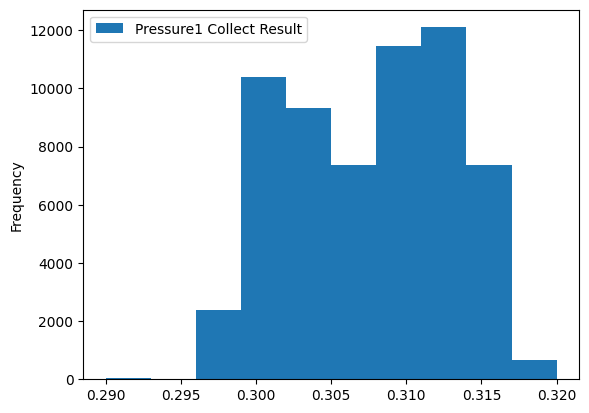

In [37]:
df[["Pressure1 Collect Result"]].plot.hist();

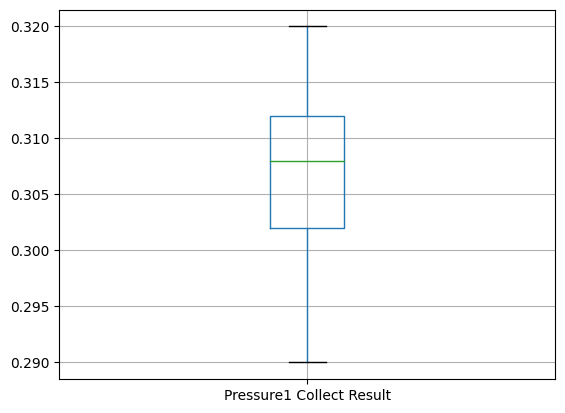

In [48]:
df[["Pressure1 Collect Result"]].boxplot();

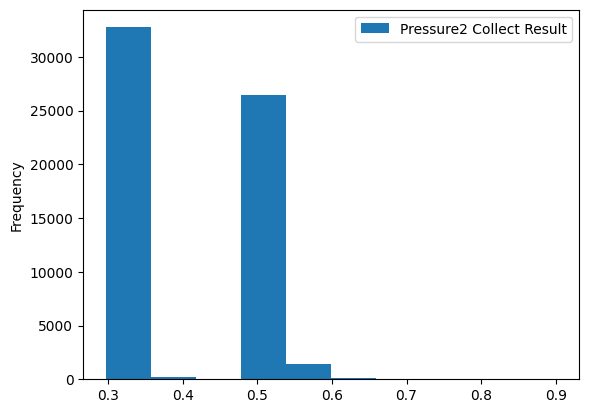

In [38]:
df[["Pressure2 Collect Result"]].plot.hist();

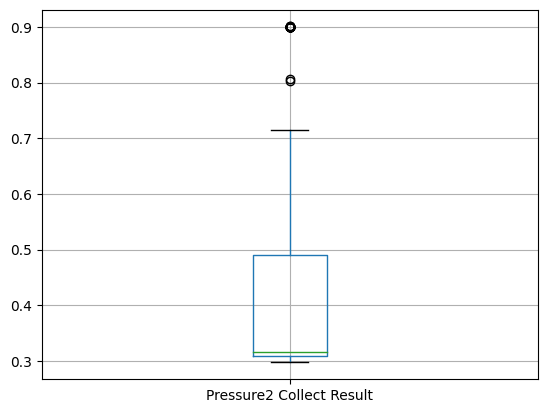

In [45]:
df[["Pressure2 Collect Result"]].boxplot();

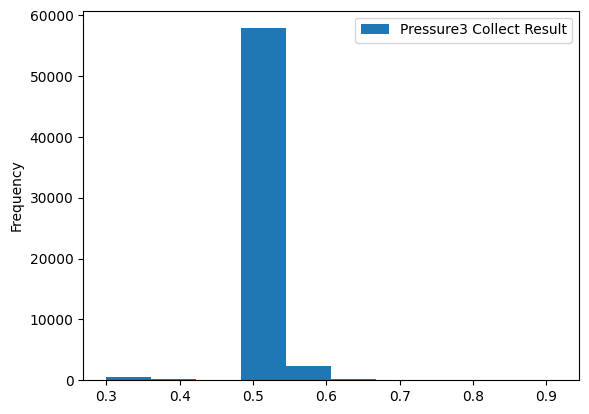

In [46]:
df[["Pressure3 Collect Result"]].plot.hist();

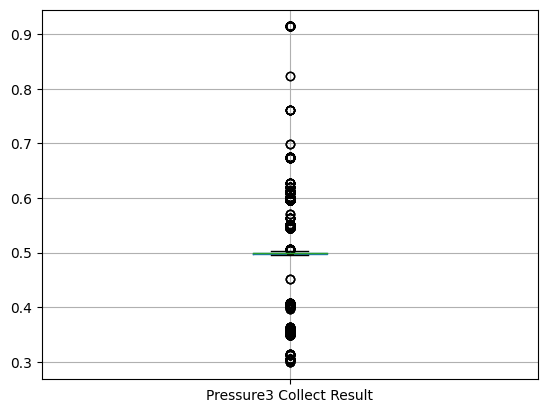

In [47]:
df[["Pressure3 Collect Result"]].boxplot();

In [58]:
df_org = df.copy()
Q1 = df['Pressure3 Collect Result'].quantile(0.25)
Q3 = df['Pressure3 Collect Result'].quantile(0.75)
print(f"Q1: {Q1}")
print(f"Q3: {Q3}") # 37451개가 다 이 사이에 있음

Q1: 0.498
Q3: 0.5


In [59]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Pressure3 Collect Result'] >= lower_bound) & (df['Pressure3 Collect Result'] <= upper_bound)]
# 61052행 -> 57851행

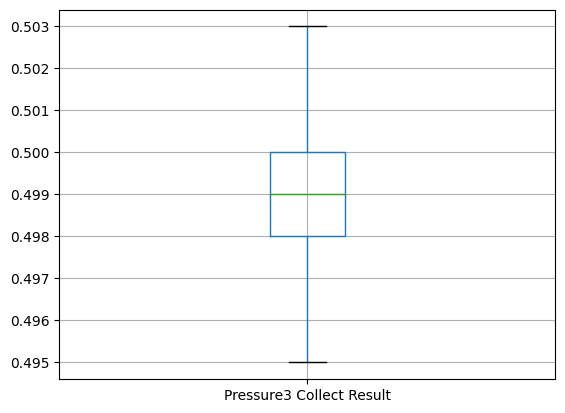

In [60]:
df[["Pressure3 Collect Result"]].boxplot();

In [64]:
df[["Pressure1 Collect Result", "Pressure1 Judge Value"]].groupby("Pressure1 Judge Value").count()

,Pressure1 Collect Result
Pressure1 Judge Value,
OK,57851


In [65]:
df[["Pressure2 Collect Result", "Pressure2 Judge Value"]].groupby("Pressure2 Judge Value").count()

,Pressure2 Collect Result
Pressure2 Judge Value,
OK,57851


In [66]:
df[["Pressure3 Collect Result", "Pressure3 Judge Value"]].groupby("Pressure3 Judge Value").count()

,Pressure3 Collect Result
Pressure3 Judge Value,
OK,57851


In [67]:
df[["Chamber Temp Collect Result", "Chamber Temp Judge Value"]].groupby("Chamber Temp Judge Value").count()

,Chamber Temp Collect Result
Chamber Temp Judge Value,
NG,15565
OK,42286


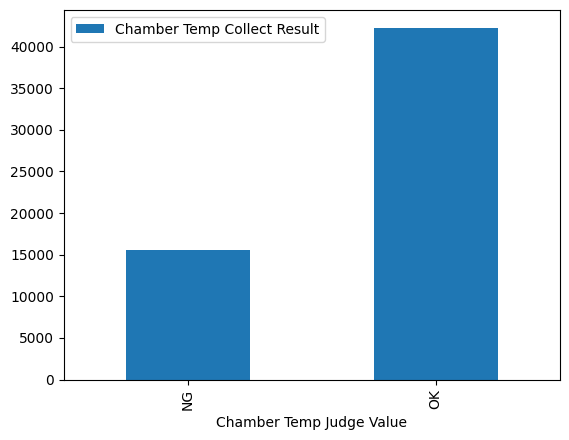

In [68]:
df[["Chamber Temp Collect Result", "Chamber Temp Judge Value"]].groupby("Chamber Temp Judge Value").count().plot.bar();

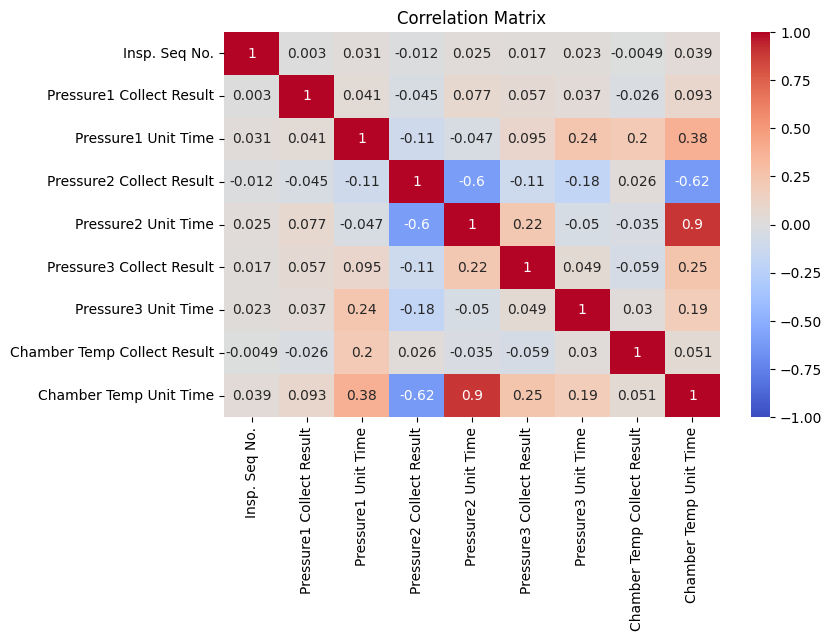

In [87]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix');

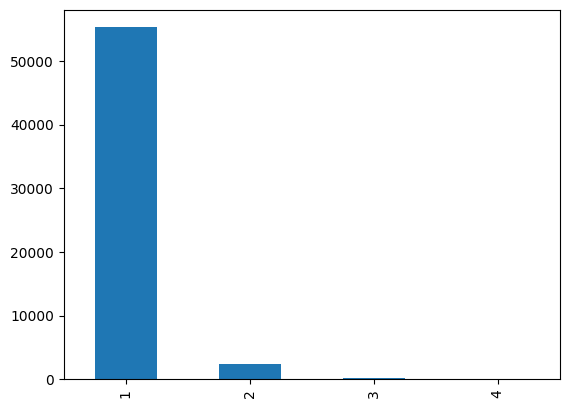

In [70]:
df["Insp. Seq No."].value_counts().plot.bar();

In [90]:
df["Model.Suffix - 1"] = df["Model.Suffix"].str[:4]

In [40]:
print(len(df["Workorder"].str.split('-', expand=True)[0].unique()))
df["Workorder"].str.split('-', expand=True)[0]

580


0        3F1X5847
1        3F1X5847
2        3F1X5847
3        3F1X5847
4        3F1X5847
           ...   
61047    4EPM0222
61048    4EPM0222
61049    4EPM0222
61050    4EPM0222
61051    4EPM0222
Name: 0, Length: 61052, dtype: object

In [38]:
df["Workorder"].str.split('-', expand=True)[0].str[:4].unique()

array(['3F1X', '3FPM', '3G1X', '3GPM', '3H1X', '3HPM', '3FPX', '3HPX',
       '3I1X', '3J1X', '3K1X', '3KPX', '3L1X', '3KPM', '3JPX', '3M1X',
       '4A1X', '3LPM', '3MPX', '3MPM', '4B1X', '4BPM', '4C1X', '4E1X',
       '4APX', '4CPM', '4F1X', '4BPX', '4EPM', '4CPX'], dtype=object)

In [41]:
df["Workorder - 1"] = df["Workorder"].str.split('-', expand=True)[0].str[:4]

In [34]:
len(df["Workorder"].unique())

677

In [18]:
df["Set ID - 1"] = df["Set ID"].str[2:11]
df["Set ID - 2"] = df["Set ID"].str[11:13]
# 753345013 9
#  05 2
# 0000333 7

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61052 entries, 0 to 61051
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Wip Line                     61052 non-null  object        
 1   Equipment                    61052 non-null  object        
 2   Model.Suffix                 61052 non-null  object        
 3   Workorder                    61052 non-null  object        
 4   Set ID                       61052 non-null  object        
 5   Collect Date                 61052 non-null  datetime64[ns]
 6   Insp. Seq No.                61052 non-null  int64         
 7   Insp Judge Code              61052 non-null  object        
 8   Pressure1 Collect Result     61052 non-null  float64       
 9   Pressure1 Unit Time          61052 non-null  int64         
 10  Pressure1 Judge Value        61052 non-null  object        
 11  Pressure2 Collect Result     61052 non-nu